Replicate Policy Impact in KW94 page 667:
"a 500 dollar per-perod subsidy assuming data set one paramters increases schooling by 1.44 periods"

In [1]:
import json
import numpy as np
import respy as rp

from python.mc_uncertainty_propagation import mc_uncertainty_propagation
from python.model_wrapper import model_wrapper_kw_94
from python.distplot import distplot
from python.convergence_plot import convergence_plot

In [2]:
params, options = rp.get_example_model("kw_94_one", with_data=False)

In [3]:
expected_qoi = model_wrapper_kw_94(params["value"].to_numpy())

In [4]:
expected_qoi

1.5417500000000004

In [5]:
#mean_vector = params["value"].to_numpy()
#cov_matrix = np.zeros((len(mean_vector), len(mean_vector)))

In [6]:
#qoi_list = mc_uncertainty_propagation(mean_vector, cov_matrix, 30, save_json=True)

In [7]:
#qoi_list

In [8]:
with open("json/qoi.json", "r") as read_file:
    qoi = json.load(read_file)

In [9]:
len(qoi)

30

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

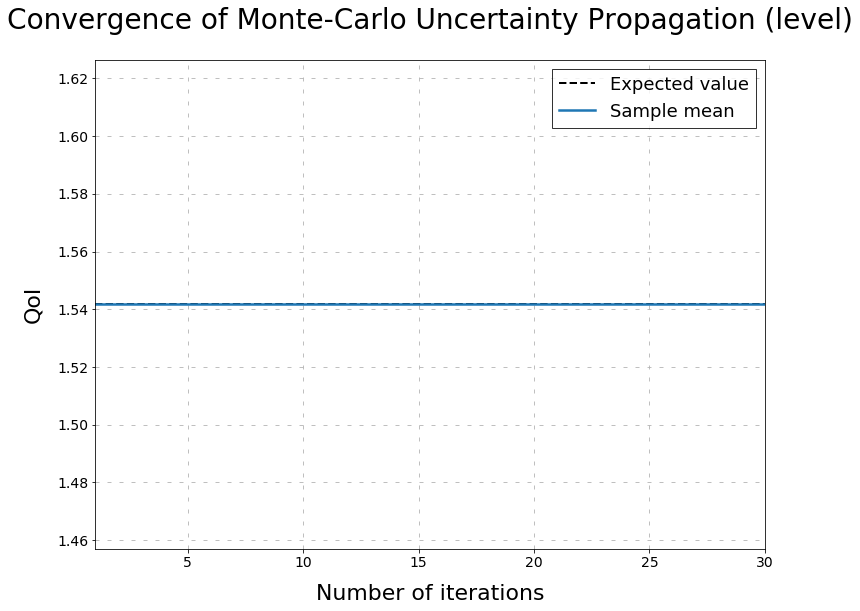

In [10]:
convergence_plot(qoi, expected_qoi, "QoI")

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

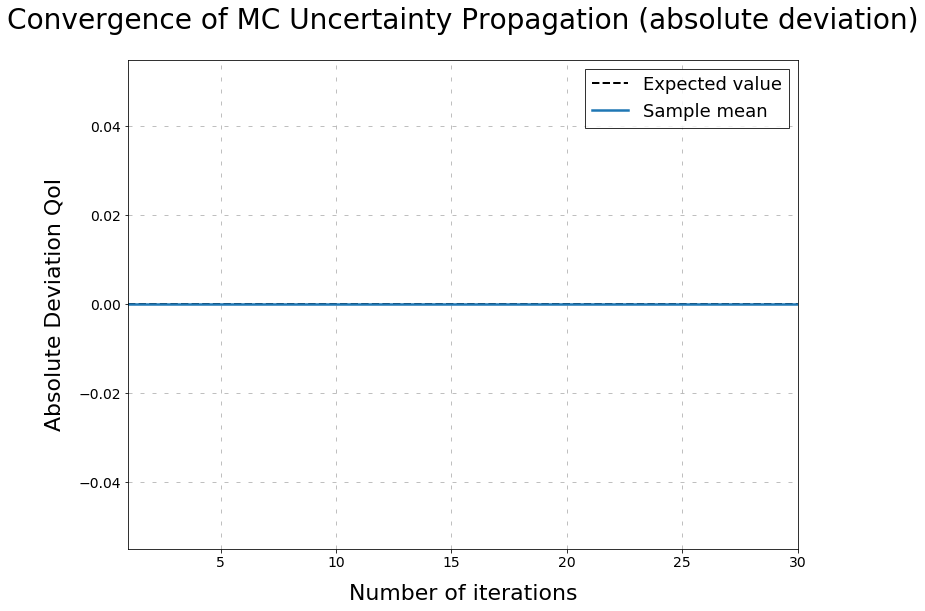

In [11]:
convergence_plot(qoi, expected_qoi, "Absolute Deviation QoI", absolute_deviation=True)

C:\Users\Tobias\AppData\Local\conda\conda\envs\uq\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Tobias\AppData\Local\conda\conda\envs\uq\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


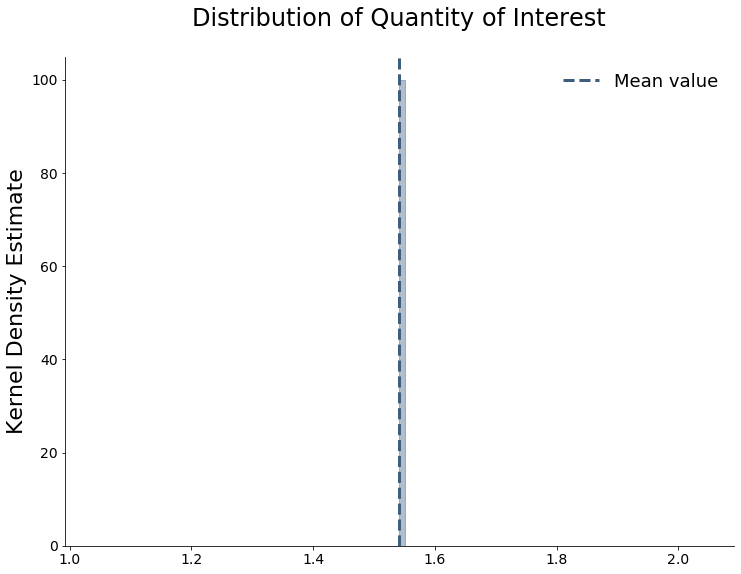

In [12]:
distplot(qoi)